In [4]:
import pandas as pd

# CSV 파일 경로
data= pd.read_csv("./eda4.csv")

In [5]:
import math

def lab2rgb(l_s, a_s, b_s):
    var_Y = (l_s + 16) / 116.0
    var_X = a_s / 500.0 + var_Y
    var_Z = var_Y - b_s / 200.0

    if var_Y**3 > 0.008856:
        var_Y = var_Y**3
    else:
        var_Y = (var_Y - 16/116) / 7.787
    if var_X**3 > 0.008856:
        var_X = var_X**3
    else:
        var_X = (var_X - 16/116) / 7.787
    if var_Z**3 > 0.008856:
        var_Z = var_Z**3
    else:
        var_Z = (var_Z - 16/116) / 7.787

    X = 95.047 * var_X
    Y = 100.000 * var_Y
    Z = 108.883 * var_Z

    var_X = X / 100.0
    var_Y = Y / 100.0
    var_Z = Z / 100.0

    var_R = var_X * 3.2406 + var_Y * -1.5372 + var_Z * -0.4986
    var_G = var_X * -0.9689 + var_Y * 1.8758 + var_Z * 0.0415
    var_B = var_X * 0.0557 + var_Y * -0.2040 + var_Z * 1.0570

    if var_R > 0.0031308:
        var_R = 1.055 * (var_R ** (1/2.4)) - 0.055
    else:
        var_R = 12.92 * var_R
    if var_G > 0.0031308:
        var_G = 1.055 * (var_G ** (1/2.4)) - 0.055
    else:
        var_G = 12.92 * var_G
    if var_B > 0.0031308:
        var_B = 1.055 * (var_B ** (1/2.4)) - 0.055
    else:
        var_B = 12.92 * var_B

    R = var_R * 255.0
    G = var_G * 255.0
    B = var_B * 255.0

    return R, G, B

# 이 함수는 주어진 L*a*b* 값을 RGB 값으로 변환합니다.
# 예를 들어:
R, G, B = lab2rgb(25.42, 8.9475, -22.77125)
print(R, G, B)


53.07723315495199 57.46896050808887 94.70754149923732


## 원하는 데이터 불러와서 변환하세요

In [6]:
data2 = data.iloc[:, -3:]

data2

,색상_L*,색상_a*,색상_b*
0,50.5100,10.5500,9.4800
1,51.8700,10.2400,9.4800
2,48.9300,10.9200,9.5700
3,49.5800,10.5200,9.7900
4,50.1000,10.6800,9.4900
...,...,...,...
3714,77.0225,19.7130,79.1715
3715,76.7375,19.3850,78.4980
3716,76.6140,19.1140,77.9200
3717,72.9490,25.2665,84.3190


In [8]:
rgb_list=[]
for index, row in data2.iterrows():
    R,G,B=lab2rgb(row["색상_L*"],row["색상_a*"],row["색상_b*"])
    rgb_list.append([R,G,B])

rgb_df= pd.DataFrame(rgb_list,columns=["R","G","B"])

# 원래 데이터프레임에 RGB 데이터프레임을 연결합니다.
df_rgb = pd.concat([data2, rgb_df], axis=1)
    

In [11]:
df_rgb

,색상_L*,색상_a*,색상_b*,R,G,B
0,50.5100,10.5500,9.4800,143.862256,113.495894,104.599370
1,51.8700,10.2400,9.4800,146.986242,117.102997,107.946493
2,48.9300,10.9200,9.5700,140.302844,109.316102,100.584131
3,49.5800,10.5200,9.7900,141.521363,111.171699,101.791266
4,50.1000,10.6800,9.4900,142.983248,112.388569,103.578614
...,...,...,...,...,...,...
3714,77.0225,19.7130,79.1715,255.592232,173.748107,11.117714
3715,76.7375,19.3850,78.4980,254.103921,173.231904,14.337166
3716,76.6140,19.1140,77.9200,253.226640,173.107097,17.455109
3717,72.9490,25.2665,84.3190,251.190531,158.597448,-51.810273


### 단일값 인덱스별로 가져오고 싶을때

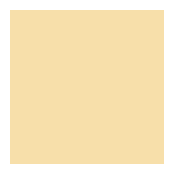

In [15]:

import matplotlib.pyplot as plt
import numpy as np  # numpy 임포트 추가

def plot_rgb_color(df, row_index):
    # 해당 위치의 RGB 값을 가져옵니다. iloc를 사용하여 위치 기반으로 접근합니다.
    color = df.iloc[row_index][['R', 'G', 'B']].values
    # RGB 값이 0에서 255 범위에 있는지 확인하고, 그렇지 않다면 정규화합니다.
    color = color / 255 if np.any(color > 1) else color
    
    # 색상을 시각화합니다.
    plt.figure(figsize=(2, 2))
    plt.imshow([[(color[0], color[1], color[2])]])  # RGB 값으로 채워진 이미지 생성
    plt.axis('off')  # 축을 숨깁니다.
    plt.show()

# 첫 번째 행의 RGB 색상을 시각화합니다.
plot_rgb_color(df_rgb, 3000)  # <- 여기 숫자를 바꾸시면됩니다


In [16]:
# 데이터프레임의 'R', 'G', 'B' 컬럼만 정규화합니다.
df_rgb_normalized = df_rgb[['R', 'G', 'B']] / 255

# 서브플롯의 크기를 결정합니다. 여기서는 5개의 열을 갖는 그리드로 설정합니다.
n_rows = len(df_rgb_normalized) // 5 + 1
n_cols = 5

# 시각화를 위한 준비
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))  # 전체 그림의 크기를 조정합니다.

# axs가 1차원 배열인 경우 2차원 배열로 변환합니다.
if n_rows == 1:
    axs = np.array([axs])

# 모든 서브플롯을 순회하며 RGB 색상을 표시합니다.
for i, (index, row) in enumerate(df_rgb_normalized.iterrows()):
    ax = axs[i // n_cols, i % n_cols]
    ax.imshow([[row.values]])  # RGB 색상으로 사각형을 그립니다.
    ax.set_title(f'Index: {index}')  # 서브플롯 위에 데이터프레임 인덱스를 표시합니다.
    ax.axis('off')  # 축을 숨깁니다.

# 남은 서브플롯을 숨깁니다.
for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

ValueError: Image size of 1500x223200 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x1335541f0> (for post_execute):


ValueError: Image size of 1500x223200 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1500x223200 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x223200 with 3720 Axes>

### 너무많은 로우를 우리는 출력할수없어서 대채코드로 합니다

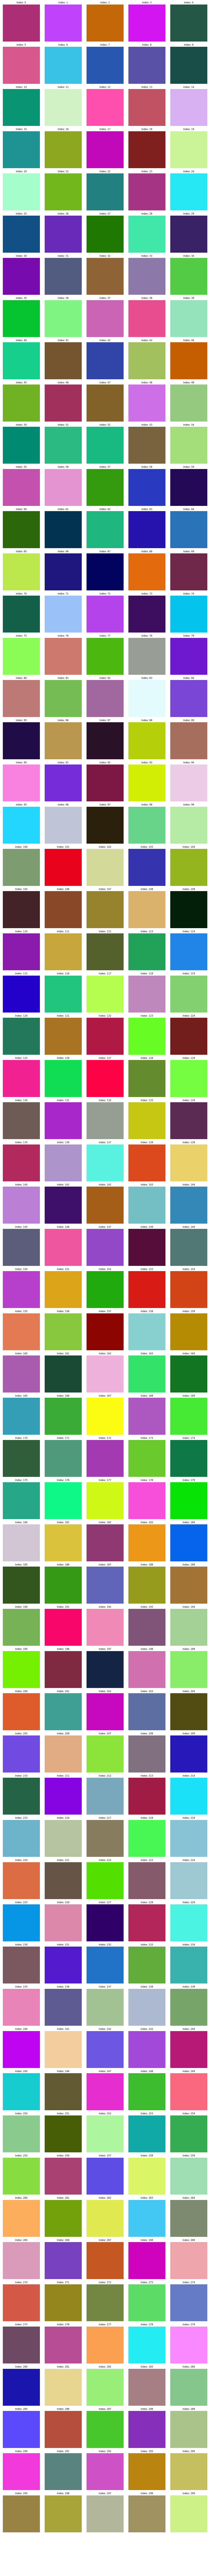

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터프레임 df_rgb를 가정합니다.

# 'R', 'G', 'B' 컬럼을 정규화합니다.
df_rgb_normalized = df_rgb[['R', 'G', 'B']] / 255

# 표시할 색상의 범위를 설정합니다.
start_index = 0  # 시작 인덱스
end_index = 300    # 끝 인덱스

# 서브플롯의 크기를 결정합니다.
n_rows = (end_index - start_index) // 5 + 1
n_cols = 5

# 시각화를 위한 준비
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))

# axs가 1차원 배열인 경우 2차원 배열로 변환합니다.
if n_rows == 1:
    axs = np.array([axs])

# 선택된 색상을 시각화합니다.
for i, (index, row) in enumerate(df_rgb_normalized.iloc[start_index:end_index].iterrows()):
    ax = axs[i // n_cols, i % n_cols]
    ax.imshow([[row.values]])
    ax.set_title(f'Index: {index}')
    ax.axis('off')

# 남은 서브플롯을 숨깁니다.
for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
plt.show()


## 스타트 인덱스와 라스트 인덱스를 참고하여 수정해주세요 
